In [72]:
import os

os.chdir('C:/Users/user/Downloads/')

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import roc_auc_score, accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

### Задача линейной регрессии

Задачу линейной регресси будем решать с помощью данных Real estate price prediction (прогноз цен на недвижимость в зависимости от возраста дома, расстояния до метро, ближайших магазинов и т.п.) https://www.kaggle.com/quantbruce/real-estate-price-prediction

In [53]:
real_estate = pd.read_csv('real estate.csv')
real_estate = real_estate.drop(columns=['No'])

In [3]:
real_estate.head(10)

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
5,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3
7,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7
8,2013.500,31.7,5512.03800,1,24.95095,121.48458,18.8
9,2013.417,17.9,1783.18000,3,24.96731,121.51486,22.1


In [43]:
real_estate.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


Посмотрим на зависимость признаков:

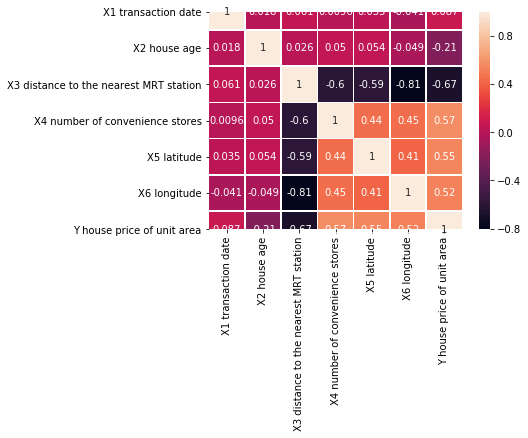

In [18]:
sns.heatmap(real_estate.corr(), annot=True, linewidths=.5, square=True)

In [108]:
X = real_estate.iloc[:, 0:6]
y = real_estate['Y house price of unit area'].copy()

Используем 80% данных для обучения и 20% - для теста: 

In [115]:
y[y < 40] = -1
y[y > 40] = 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Обучим алгоритм:

In [110]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [114]:
from sklearn.metrics import mean_squared_error
from math import sqrt

m = mean_squared_error(y_test, y_pred)
sqrt(m)

0.7993498426963457

Среднеквадратичная ошибка RMSE = 0.8, что составляет менее 3% от среднего значения стоимости дома за единицу площади (37.98). 
Следовательно, можно сделать вывод, что полученная модель точна и может дать достаточно хорошие прогнозы.

Визуализируем результаты моделирования:

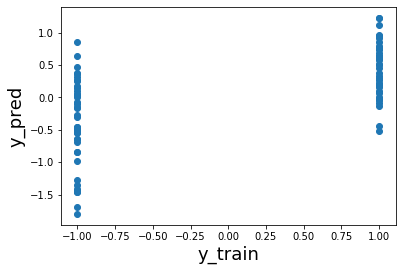

In [112]:
plt.scatter(y_test, y_pred)

plt.xlabel('y_train', size=18)
plt.ylabel('y_pred', size=18)

plt.show()

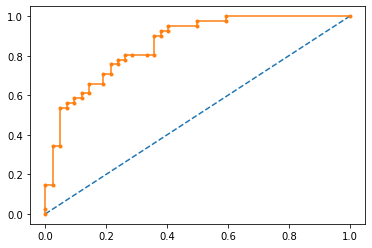

In [113]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

### Задача логистической регрессии

Для логистической регрессии будем использовать те же данные Real estate price prediction

In [94]:
X = real_estate.iloc[:, 0:2]
y = real_estate['Y house price of unit area'].copy()

In [95]:
from sklearn.linear_model import LogisticRegression

y[y < 40] = -1
y[y > 40] = 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LogisticRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

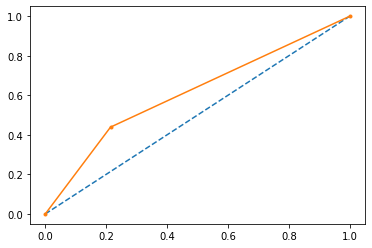

In [96]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [97]:
accuracy_score(y_test, y_pred)

0.6144578313253012

Попробуем добавить признаки:

In [89]:
X = real_estate.iloc[:, 0:6]
y = real_estate['Y house price of unit area'].copy()

In [90]:
y[y < 40] = -1
y[y > 40] = 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LogisticRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [91]:
accuracy_score(y_test, y_pred)

0.8313253012048193

Качество модели увеличилось, следовательно, лучше использовать все признаки.

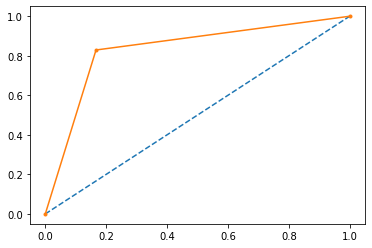

In [93]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()